In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import QTable,vstack
import astropy.units as u
import astropy.utils
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import matplotlib.colors
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import lognorm
from scipy.stats import f
from astropy.timeseries import LombScargle
import time
from astropy.visualization import hist
from scipy.optimize import curve_fit
from astropy.timeseries import BoxLeastSquares
from astropy.timeseries import TimeSeries
from astropy.time import Time
from tqdm import tqdm


import functions
#import upsilon

In [22]:
t_zr=QTable.read('t_zr_0109.ecsv')
t_zg=QTable.read('t_zg_0109.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

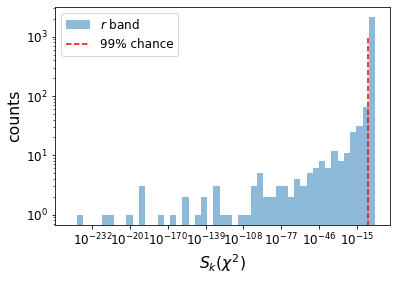

In [3]:
fs=12
sf=np.array(t_zr['sf'])
histo=hist(sf,bins=np.logspace(np.log10(1e-250),np.log10(1),num=50),label='$r$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zr)),0,1000,ls='--',color='r',label='99% chance')
#,histtype='step'
plt.xlabel('$S_k(\chi^2)$',fontsize=fs*1.3)
plt.ylabel('counts',fontsize=fs*1.3)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
#histo

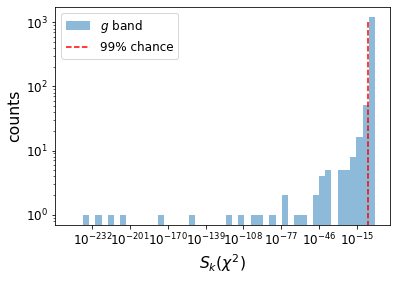

In [4]:
fs=12
sf=np.array(t_zg['sf'])
histo=hist(sf,bins=np.logspace(np.log10(1e-250),np.log10(1),num=50),label='$g$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zr)),0,1000,ls='--',color='r',label='99% chance')
#,histtype='step'
plt.xlabel('$S_k(\chi^2)$',fontsize=fs*1.3)
plt.ylabel('counts',fontsize=fs*1.3)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
#histo

In [5]:
1/(100*len(t_zr))

4.154549231408392e-06

In [6]:
1/(100*len(t_zg))

7.496251874062969e-06

In [7]:
len(t_zr)

2407

In [8]:
len(t_zg)

1334

In [9]:
t_zr=QTable.read('t_zr_0109.ecsv')
t_zg=QTable.read('t_zg_0109.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

var_zr=t_zr[t_zr['sf']<1/(100*len(t_zr))] #99% chance variabe
var_zg=t_zg[t_zg['sf']<1/(100*len(t_zg))] #99% chance variabe

nonvar_zr=t_zr[t_zr['sf']>1/(100*len(t_zr))]
nonvar_zg=t_zg[t_zg['sf']>1/(100*len(t_zg))]

In [10]:
len(var_zr),len(var_zg)

(250, 117)

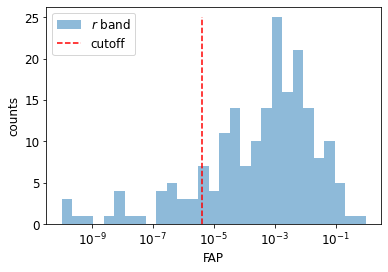

In [11]:
histo=hist(var_zr['LNP_SIG'],bins=np.logspace(np.log10(1e-10),np.log10(1),num=30),label='$r$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zr)),0,25,ls='--',color='r',label='cutoff')
#,histtype='step'
plt.xlabel('FAP',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#histo

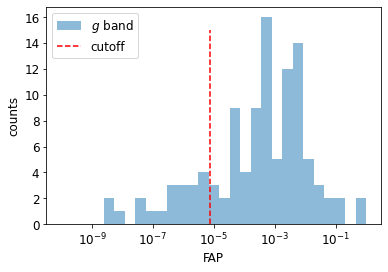

In [12]:
histo=hist(var_zg['LNP_SIG'],bins=np.logspace(np.log10(1e-10),np.log10(1),num=30),label='$g$ band',alpha=0.5)
plt.vlines(1/(100*len(t_zg)),0,15,ls='--',color='r',label='cutoff')
#,histtype='step'
plt.xlabel('FAP',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#histo

In [13]:
def cut_LNP_SIG(t,period,LNP_SIG):
    #t=t[(t['period']<period[0])|(t['period']>period[1])]
    #t=t[(t['period']<period[2])|(t['period']>period[3])]
    #if len(period)>4:
        #t=t[(t['period']<period[4])|(t['period']>period[5])]
    t=t[t['LNP_SIG']<LNP_SIG]
    return t

t_zr=cut_LNP_SIG(var_zr,_,1/(100*len(t_zr)))
t_zg=cut_LNP_SIG(var_zg,_,1/(100*len(t_zg)))

In [14]:
len(t_zr),len(t_zg)

(86, 29)

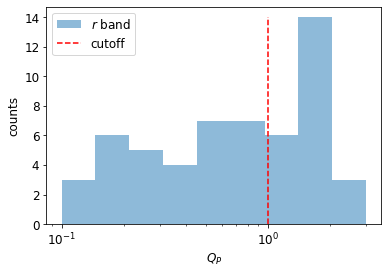

In [15]:
obj=t_zr['power']/t_zr['power_c']
plt.hist(obj, bins=np.logspace(np.log10(0.1),np.log10(3.0), 10),alpha=0.5,label='$r$ band')
plt.vlines(1,0,14,ls='--',color='r',label='cutoff')
plt.xlabel('$Q_P$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

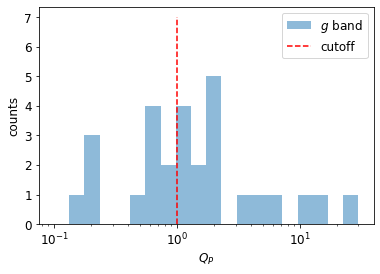

In [16]:
obj=t_zg['power']/t_zg['power_c']
plt.hist(obj, bins=np.logspace(np.log10(0.1),np.log10(30.0), 21),alpha=0.5,label='$g$ band')
plt.vlines(1,0,7,ls='--',color='r',label='cutoff')
plt.xlabel('$Q_P$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [17]:
obj_zr=t_zr[t_zr['power']/t_zr['power_c']>=1]
obj_zg=t_zg[t_zg['power']/t_zg['power_c']>=1]

In [18]:
len(obj_zr),len(obj_zg)

(53, 18)

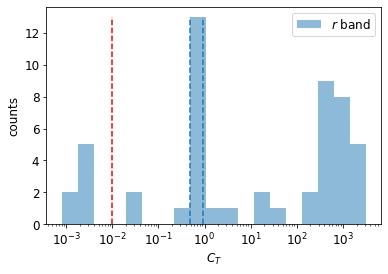

In [19]:
obj=np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']
plt.hist(obj, bins=np.logspace(np.log10(obj[obj!=0].min()),np.log10(obj.max()), 20),alpha=0.5,label='$r$ band')
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines((0.49,0.91),0,13,ls='--')
plt.vlines((1e-2),0,13,ls='--',color='r')
plt.xlabel('$C_T$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.xlim(0.1,1)

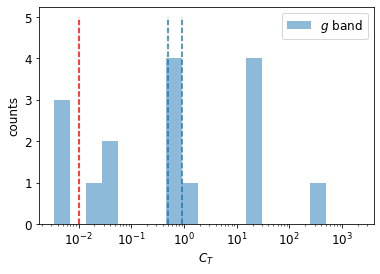

In [20]:
obj=np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']
plt.hist(obj, bins=np.logspace(np.log10(obj[obj!=0].min()),np.log10(obj.max()), 20),alpha=0.5,label='$g$ band')
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines((0.49,0.91),0,5,ls='--')
plt.vlines((1e-2),0,5,ls='--',color='r')
plt.xlabel('$C_T$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)

In [33]:
t_zr=QTable.read('t_zr_0109.ecsv')
t_zg=QTable.read('t_zg_0109.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

var_zr=t_zr[t_zr['sf']<1/(100*len(t_zr))] #99% chance variabe
var_zg=t_zg[t_zg['sf']<1/(100*len(t_zg))] #99% chance variabe

nonvar_zr=t_zr[t_zr['sf']>1/(100*len(t_zr))]
nonvar_zg=t_zg[t_zg['sf']>1/(100*len(t_zg))]

def cut_LNP_SIG(t,period,LNP_SIG):
    #t=t[(t['period']<period[0])|(t['period']>period[1])]
    #t=t[(t['period']<period[2])|(t['period']>period[3])]
    #if len(period)>4:
        #t=t[(t['period']<period[4])|(t['period']>period[5])]
    t=t[t['LNP_SIG']<LNP_SIG]
    return t

t_zr=cut_LNP_SIG(var_zr,_,1/(100*len(t_zr)))
t_zg=cut_LNP_SIG(var_zg,_,1/(100*len(t_zg)))


# cut power ratios
obj_zr=t_zr[t_zr['power']/t_zr['power_c']>=1]
obj_zg=t_zg[t_zg['power']/t_zg['power_c']>=1]


# cut close periods
obj_zr=obj_zr[np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>1e-2]
obj_zg=obj_zg[np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>1e-2]

obj_zr=obj_zr[(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']<0.49)|(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>0.91)|(obj_zr['LNP_SIG']<1e-30)]
obj_zg=obj_zg[(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']<0.49)|(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>0.91)|(obj_zg['LNP_SIG']<1e-30)]



In [34]:
len(obj_zr),len(obj_zg)

(40, 10)

In [21]:
obj_zr

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,Gmag,RFG,Plx,e_Plx,var
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,float64,float64,float64,float64,str1
52,zr,806203100023276,5.0806496,59.3093092,664,48.39557647705078,9.548270702053268,1.3227187319910005e-189,0.3108588755130768,1.7018337280194596e-78,595.2450708466688,0.997336033066433,0.6229683753591274,0.21949631231274336,19.675853729248047,0.3108588755130768,19.17412567138672,20.918895721435547,-0.7161276936531067,3.285275936126709,0.05060821258505381,0.007833020026423389,0.026125014733712922,0.0,0.014227170500624942,0.0517871312497491,0.20132354399945207,g2,LPV_OSARG_AGB,0.33,0.0,566.9630815875007,[HL90] 61,1.854526,HII,1,18.839401,159.932,0.351,0.184,P
56,zr,806203100043681,5.086272,59.3045493,852,182.57254028320312,5.501504515724585,1.178785791102728e-72,0.07287368923425674,1.776924201704441e-72,0.9965471782030612,0.997336033066433,0.5524583377419667,0.04708310928671008,18.113143920898438,0.07287368923425674,17.96570587158203,18.329402923583984,-0.0999746099114418,2.3490726947784424,1.2781460614539681,0.10651103530567314,0.7149426823406075,0.0,0.004183510488106168,0.013196539652728934,0.2306395206078602,g2,EB_ESD,0.36,1.0,1.00081744322595,--,nan,--,1,18.044952,463.443,-0.1818,0.1085,V
77,zr,806203100063307,5.0870906,59.2998095,836,344.7351989746094,40.842491010031104,0.0,0.22717958688735962,7.488112388238467e-24,26.55255504914417,0.997336033066433,0.25554257162342087,0.0034232661997002983,18.791976928710938,0.22717958688735962,17.675485610961914,19.1998348236084,-0.8078729510307312,6.599571704864502,0.010941253454579771,0.0022451831278411214,0.04598158685382897,1.0,0.024749755228021697,0.001446042828369909,0.961198797591372,g1,CEPH_Other,0.44,0.0,26.524588612280738,[WWW2005] XA 11,0.264632,X,2,19.001991,118.576,0.0394,0.2003,P
77,zr,1809211300074746,5.0870934,59.2997909,75,339.8369140625,80.43303571096826,0.0,0.26337021589279175,1.3349568059073803e-11,0.5081678123002179,2800.0,0.5958935079344113,0.34858179928581884,18.844051361083984,0.26337021589279175,17.768030166625977,19.322647094726562,-1.2469897270202637,9.363984107971191,0.060816512321346654,0.020122908699598416,0.08327234162645296,1.0,0.06264230945395721,0.03406160489283805,0.6555665316467969,g1,EB_ED,0.38,1.0,26.573868749999964,[WWW2005] XA 11,0.264632,X,2,19.001991,118.576,0.0394,0.2003,N
78,zr,806203100052200,5.0686598,59.2952578,611,49.98769760131836,5.024078453276019,2.081901171402139e-45,0.22250483930110931,1.9208088584686619e-34,0.9947113608921695,0.997336033066433,0.40593276225765645,0.11208419083762625,19.897632598876953,0.22250483930110931,19.19382667541504,20.5157470703125,-0.33768612146377563,2.315326452255249,0.016401466798190056,0.017597898460062673,0.04075432819749003,0.0,0.5380408921532227,0.1042832362727939,0.873587866421281,g1,EB_ESD,0.21,1.0,0.9946720729605276,--,nan,--,1,19.660278,163.345,0.4128,0.3378,V
85,zr,806203100043574,5.0847668,59.3104637,851,318.66693115234375,7.3033749996561035,9.744796541338584e-132,0.0903315320611,4.085919146039346e-13,0.9981261378154066,0.997336033066433,0.15714517787338797,0.08743339411817201,18.225955963134766,0.0903315320611,17.847694396972656,18.63309669494629,-0.14767564833164215,2.711042642593384,0.09595555800822879,0.004053642434541914,0.030528423946906576,1.0,0.001083804421499579,0.010517594610956915,0.07690978566166085,gu,EB_ED,0.55,1.0,0.998174439414614,LGGS J002020.35+591837.6,0.079779,Em*,3,19.161631,84.436,nan,nan,V
90,zr,806203100056957,5.0836327,59.3114535,846,567.4482421875

In [87]:
t_zr=QTable.read('t_zr_0109.ecsv')
t_zg=QTable.read('t_zg_0109.ecsv')
t_zr['lc_var']='N'
t_zg['lc_var']='N'
t_zr['var']='N'
t_zg['var']='N'
t_zr['var_flag']=False
t_zg['var_flag']=False

for row in t_zr:
    if row['sf']<1/(100*len(t_zr)):
        row['lc_var']='V'
        
for row in t_zg:
    if row['sf']<1/(100*len(t_zg)):
        row['lc_var']='V'

var_zr=t_zr[t_zr['sf']<1/(100*len(t_zr))] #99% chance variabe
var_zg=t_zg[t_zg['sf']<1/(100*len(t_zg))] #99% chance variabe

nonvar_zr=t_zr[t_zr['sf']>1/(100*len(t_zr))]
nonvar_zg=t_zg[t_zg['sf']>1/(100*len(t_zg))]

def cut_LNP_SIG(t,period,LNP_SIG):
    #t=t[(t['period']<period[0])|(t['period']>period[1])]
    #t=t[(t['period']<period[2])|(t['period']>period[3])]
    #if len(period)>4:
        #t=t[(t['period']<period[4])|(t['period']>period[5])]
    t=t[t['LNP_SIG']<LNP_SIG]
    return t

tt_zr=cut_LNP_SIG(var_zr,_,1/(100*len(t_zr)))
tt_zg=cut_LNP_SIG(var_zg,_,1/(100*len(t_zg)))


# cut power ratios
obj_zr=tt_zr[tt_zr['power']/tt_zr['power_c']>=1]
obj_zg=tt_zg[tt_zg['power']/tt_zg['power_c']>=1]


# cut close periods
obj_zr=obj_zr[np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>1e-2]
obj_zg=obj_zg[np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>1e-2]

obj_zr=obj_zr[(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']<0.49)|(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>0.91)|(obj_zr['LNP_SIG']<1e-30)]
obj_zg=obj_zg[(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']<0.49)|(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>0.91)|(obj_zg['LNP_SIG']<1e-30)]


for row in t_zr:
    if len(obj_zr[obj_zr['OID']==row['OID']])!=0:
        row['lc_var']='P'

for row in t_zg:
    if len(obj_zg[obj_zg['OID']==row['OID']])!=0:
        row['lc_var']='P'

# process degeneracy
for row in t_zr:
    group=t_zr[t_zr['SourceID']==row['SourceID']]
    groupmax=group[group['numobs'].argmax()]
    if groupmax['OID']==row['OID']:
        row['var']=row['lc_var']
    if groupmax['OID']!=row['OID']:
        row['var']=groupmax['lc_var']
        if (groupmax['lc_var']=='N') and (row['lc_var']!='N'):
            row['var_flag']=True

for row in t_zg:
    group=t_zg[t_zg['SourceID']==row['SourceID']]
    groupmax=group[group['numobs'].argmax()]
    if groupmax['OID']==row['OID']:
        row['var']=row['lc_var']
    if groupmax['OID']!=row['OID']:
        row['var']=groupmax['lc_var']
        if (groupmax['lc_var']=='N') and (row['lc_var']!='N'):
            row['var_flag']=True
            
obj_zr=t_zr[(t_zr['var']=='P')]
obj_zg=t_zg[(t_zg['var']=='P')]

In [93]:
t_zr.write('t_zr_0222.ecsv',overwrite=True)
t_zg.write('t_zg_0222.ecsv',overwrite=True)

In [88]:
obj_zr.show_in_notebook()

idx,SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,Gmag,RFG,Plx,e_Plx,var,lc_var,var_flag
0,52,zr,1809211300054348,5.0806374,59.3092921,70,54.861793518066406,3.8287349694500223,7.479393901880701e-06,0.1666656732559204,1.9070708062533334e-05,462.22886833491833,2800.0,0.4143551402254435,0.8929084671484715,19.547266006469727,0.1666656732559204,19.179689407348633,20.374217987060547,-0.2487855702638626,1.9824135303497314,0.023752797415915242,0.03586219985223847,0.04073117478282561,1.0,0.8833477322406814,0.38542511478098085,0.7531769233421609,g1,LPV_SRV_AGB_O,0.56,1.0,221.44868054999824,[HL90] 61,1.854526,HII,1,18.839401,159.932,0.351,0.184,P,N,False
1,52,zr,806203100023276,5.0806496,59.3093092,664,48.39557647705078,9.548270702053268,1.3227187319910005e-189,0.3108588755130768,1.7018337280194596e-78,595.2450708466688,0.997336033066433,0.6229683753591274,0.21949631231274336,19.675853729248047,0.3108588755130768,19.17412567138672,20.918895721435547,-0.7161276936531067,3.285275936126709,0.05060821258505381,0.007833020026423389,0.026125014733712922,0.0,0.014227170500624942,0.0517871312497491,0.20132354399945207,g2,LPV_OSARG_AGB,0.33,0.0,566.9630815875007,[HL90] 61,1.854526,HII,1,18.839401,159.932,0.351,0.184,P,P,False
2,77,zr,806203100063307,5.0870906,59.2998095,836,344.7351989746094,40.842491010031104,0.0,0.22717958688735962,7.488112388238467e-24,26.55255504914417,0.997336033066433,0.25554257162342087,0.0034232661997002983,18.791976928710938,0.22717958688735962,17.675485610961914,19.1998348236084,-0.8078729510307312,6.599571704864502,0.010941253454579771,0.0022451831278411214,0.04598158685382897,1.0,0.024749755228021697,0.001446042828369909,0.961198797591372,g1,CEPH_Other,0.44,0.0,26.524588612280738,[WWW2005] XA 11,0.264632,X,2,19.001991,118.576,0.0394,0.2003,P,P,False
3,77,zr,1809211300074746,5.0870934,59.2997909,75,339.8369140625,80.43303571096826,0.0,0.26337021589279175,1.3349568059073803e-11,0.5081678123002179,2800.0,0.5958935079344113,0.34858179928581884,18.844051361083984,0.26337021589279175,17.768030166625977,19.322647094726562,-1.2469897270202637,9.363984107971191,0.060816512321346654,0.020122908699598416,0.08327234162645296,1.0,0.06264230945395721,0.03406160489283805,0.6555665316467969,g1,EB_ED,0.38,1.0,26.573868749999964,[WWW2005] XA 11,0.264632,X,2,19.001991,118.576,0.0394,0.2003,P,P,False
4,90,zr,1809211300042387,5.083505,59.3114538,76,335.14105224609375,55.45322806162426,0.0,0.2555650770664215,2.0784866526889912e-39,2800.0,2800.0,0.9309604412577608,0.9992448196539399,18.229490280151367,0.2555650770664215,17.943700790405273,18.82109832763672,-1.287727952003479,7.673773765563965,0.5555584658587479,0.04627441335937462,0.5534192405367697,0.0,0.004179634055204828,0.004211741656930057,0.49803513609818195,g2,LPV_Mira_AGB_C,0.31,0.0,1328.6934374999983,LGGS J002020.03+591841.2,0.205743,Em*,2,19.434788,102.102,-0.3582,0.2602,P,V,False
5,90,zr,806203100056957,5.0836327,59.3114535,846,567.4482421875,120.79296419281002,0.0,0.3739984333515167,3.247011689208663e-280,2043.207284960579,0.997336033066433,0.9506730073393318,0.47493011002121566,18.124500274658203,0.3739984333515167,17.195171356201172,18.949966430664062,-2.5609970092773438,11.737095832824707,0.18947997991941207,0.020160519579386485,0.15060952910358819,0.0,0.006788985925998747,0.01068657840378251,0.38484022277800156,g2,LPV_Mira_AGB_C,0.26,0.0,2267.852326350003,LGGS J002020.03+591841.2,0.205743,Em*,2,19.434788,102.102,-0.3582,0.2602,P,P,False
6,145,zr,806203100043772,5.0957151,59.2994528,717,66.61664581298828,3.5379984089296954,2.2753838245357322e-18,0.14171883463859558,1.0515294240953812e-12,981.7766691905116,0.997336033066433,0.17591322363193937,0.09890003454859338,19.4619083404541,0.14171883463859558,18.99640655517578,20.149547

In [89]:
np.unique(obj_zr['SourceID']).shape,np.unique(obj_zg['SourceID']).shape

((32,), (9,))

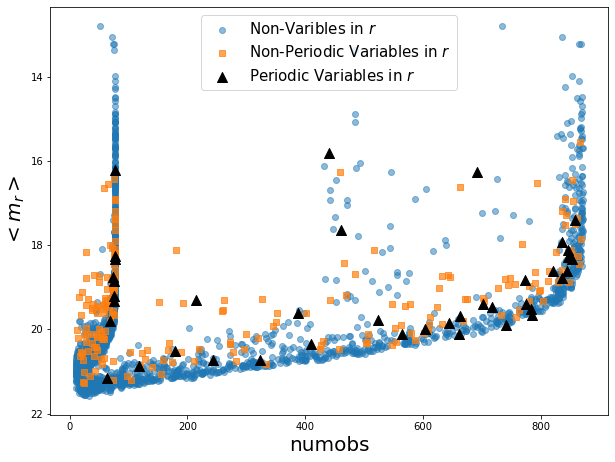

In [146]:
plt.figure(figsize=(10,7.5))
plt.scatter(t_zr[t_zr['lc_var']=='N']['numobs'],t_zr[t_zr['lc_var']=='N']['mean'],label='Non-Varibles in $r$',alpha=0.5,marker='o')
plt.scatter(t_zr[t_zr['lc_var']=='V']['numobs'],t_zr[t_zr['lc_var']=='V']['mean'],label='Non-Periodic Variables in $r$',alpha=0.7,marker='s')
plt.scatter(t_zr[t_zr['lc_var']=='P']['numobs'],t_zr[t_zr['lc_var']=='P']['mean'],label='Periodic Variables in $r$',marker='^',s=100,c='black')
#plt.scatter(tt[tt['shape']=='gu']['numobs'],tt[tt['shape']=='gu']['mean'],label='Gumble non-variables',alpha=0.5)
plt.gca().invert_yaxis()
#plt.xscale('log')
plt.xlabel('numobs',fontsize=20)
plt.ylabel('$<m_r>$',fontsize=20)
plt.legend(fontsize=15)

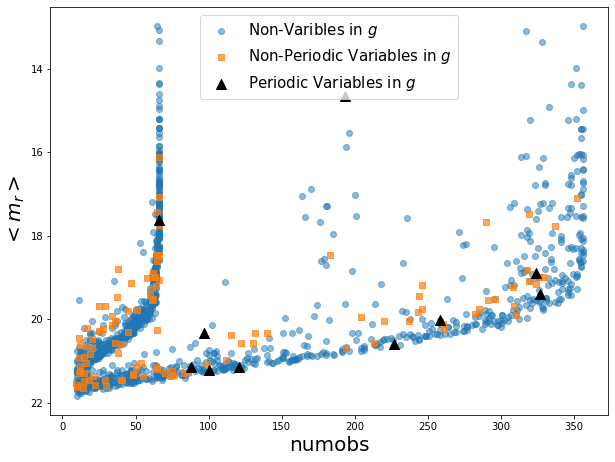

In [148]:
plt.figure(figsize=(10,7.5))
plt.scatter(t_zg[t_zg['lc_var']=='N']['numobs'],t_zg[t_zg['lc_var']=='N']['mean'],label='Non-Varibles in $g$',alpha=0.5,marker='o')
plt.scatter(t_zg[t_zg['lc_var']=='V']['numobs'],t_zg[t_zg['lc_var']=='V']['mean'],label='Non-Periodic Variables in $g$',alpha=0.7,marker='s')
plt.scatter(t_zg[t_zg['lc_var']=='P']['numobs'],t_zg[t_zg['lc_var']=='P']['mean'],label='Periodic Variables in $g$',marker='^',s=100,c='black')
#plt.scatter(tt[tt['shape']=='gu']['numobs'],tt[tt['shape']=='gu']['mean'],label='Gumble non-variables',alpha=0.5)
plt.gca().invert_yaxis()
#plt.xscale('log')
plt.xlabel('numobs',fontsize=20)
plt.ylabel('$<m_r>$',fontsize=20)
plt.legend(fontsize=15,loc=0)

In [2]:
t_zr=QTable.read('t_zr_0222.ecsv')
t_zg=QTable.read('t_zg_0222.ecsv')

In [128]:
len(t_zr[t_zr['var_flag']==1]),len(t_zg[t_zg['var_flag']==1])

(1, 4)

In [3]:
t_zr=QTable.read('t_zr_0222.ecsv')
t_zg=QTable.read('t_zg_0222.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

In [12]:
var_zr=t_zr[(t_zr['var']=='V')|(t_zr['var']=='P')]
var_zg=t_zg[(t_zg['var']=='V')|(t_zg['var']=='P')]
obj_zr=t_zr[t_zr['var']=='P']
obj_zg=t_zg[t_zg['var']=='P']

In [37]:
nonvar_zr=t_zr[t_zr['var']=='N']
nonvar_zg=t_zg[t_zg['var']=='N']

In [13]:
len(np.unique(t_zr['SourceID'])),len(np.unique(t_zg['SourceID'])),len(np.intersect1d(np.unique(t_zr['SourceID']),np.unique(t_zg['SourceID'])))

(1516, 864, 821)

In [14]:
len(np.unique(var_zr['SourceID'])),len(np.unique(var_zg['SourceID'])),len(np.intersect1d(np.unique(var_zr['SourceID']),np.unique(var_zg['SourceID'])))

(187, 97, 42)

In [15]:
len(np.unique(obj_zr['SourceID'])),len(np.unique(obj_zg['SourceID'])),len(np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(obj_zg['SourceID'])))

(32, 9, 2)

In [16]:
unobj_zr=var_zr[np.isin(var_zr['SourceID'],obj_zr['SourceID'])==0]
unobj_zg=var_zg[np.isin(var_zg['SourceID'],obj_zg['SourceID'])==0]

In [17]:
len(np.unique(unobj_zr['SourceID'])),len(np.unique(unobj_zg['SourceID'])),len(np.intersect1d(np.unique(unobj_zr['SourceID']),np.unique(unobj_zg['SourceID'])))

(155, 88, 35)

In [18]:
len(np.unique(t_zr[np.isin(t_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

695

In [19]:
len(np.unique(t_zg[np.isin(t_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

43

In [20]:
len(np.unique(var_zr[np.isin(var_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

84

In [21]:
len(np.unique(var_zg[np.isin(var_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

18

In [22]:
len(np.unique(obj_zr[np.isin(obj_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

15

In [23]:
len(np.unique(obj_zg[np.isin(obj_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

0

In [24]:
len(np.unique(unobj_zr[np.isin(unobj_zr['SourceID'],t_zg['SourceID'])==0]['SourceID']))

69

In [25]:
len(np.unique(unobj_zg[np.isin(unobj_zg['SourceID'],t_zr['SourceID'])==0]['SourceID']))

18

In [26]:
t_color=QTable.read('t_color_0912.ecsv')

In [27]:
t_color['mean_color'][~np.isnan(t_color['mean_color'])].mean()

1.0785452662794939

In [28]:
def sourcefy(t):
    mask=np.zeros(len(t))+1
    for i,row in enumerate(t):
        copy=t[t['SourceID']==row['SourceID']]
        if len(copy)>1:
            if row['OID']!=copy['OID'][copy['numobs'].argmax()]:
                mask[i]=0
    t=t[mask==1]
    return t

In [41]:
t=sourcefy(nonvar_zr)

In [46]:
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(1329, 974, 303, 52)

In [47]:
t=sourcefy(nonvar_zg)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(767, 545, 176, 46)

In [49]:
t=sourcefy(obj_zr)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(32, 14, 4, 14)

In [50]:
t=sourcefy(obj_zg)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(9, 8, 0, 1)

In [51]:
t=sourcefy(unobj_zr)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(155, 104, 25, 26)

In [53]:
t=sourcefy(unobj_zg)
len(t),len(t[t['shape']=='g1']),len(t[t['shape']=='gu']),len(t[t['shape']=='g2'])

(88, 50, 24, 14)

In [149]:
t=sourcefy(nonvar_zr)

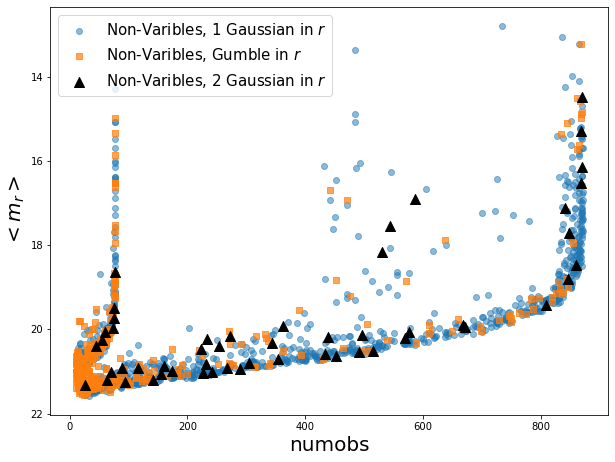

In [150]:
plt.figure(figsize=(10,7.5))
plt.scatter(t[t['shape']=='g1']['numobs'],t[t['shape']=='g1']['mean'],label='Non-Varibles, 1 Gaussian in $r$',alpha=0.5,marker='o')
plt.scatter(t[t['shape']=='gu']['numobs'],t[t['shape']=='gu']['mean'],label='Non-Varibles, Gumble in $r$',alpha=0.7,marker='s')
plt.scatter(t[t['shape']=='g2']['numobs'],t[t['shape']=='g2']['mean'],label='Non-Varibles, 2 Gaussian in $r$',marker='^',s=100,c='black')
plt.gca().invert_yaxis()
#plt.xscale('log')
plt.xlabel('numobs',fontsize=20)
plt.ylabel('$<m_r>$',fontsize=20)
plt.legend(fontsize=15)

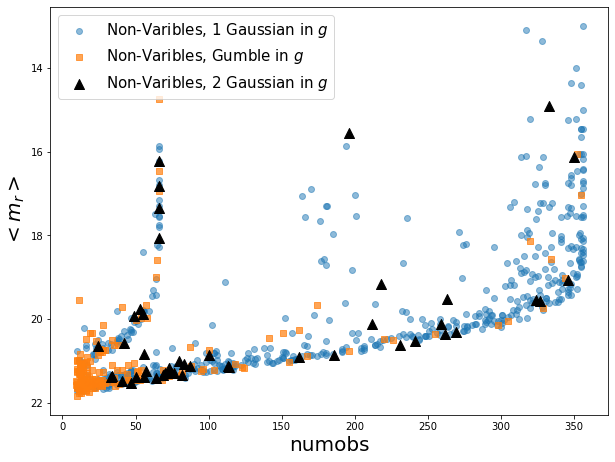

In [151]:
t=sourcefy(nonvar_zg)
plt.figure(figsize=(10,7.5))
plt.scatter(t[t['shape']=='g1']['numobs'],t[t['shape']=='g1']['mean'],label='Non-Varibles, 1 Gaussian in $g$',alpha=0.5,marker='o')
plt.scatter(t[t['shape']=='gu']['numobs'],t[t['shape']=='gu']['mean'],label='Non-Varibles, Gumble in $g$',alpha=0.7,marker='s')
plt.scatter(t[t['shape']=='g2']['numobs'],t[t['shape']=='g2']['mean'],label='Non-Varibles, 2 Gaussian in $g$',marker='^',s=100,c='black')
plt.gca().invert_yaxis()
#plt.xscale('log')
plt.xlabel('numobs',fontsize=20)
plt.ylabel('$<m_r>$',fontsize=20)
plt.legend(fontsize=15)

In [77]:
t_color=QTable.read('t_color_0912.ecsv')

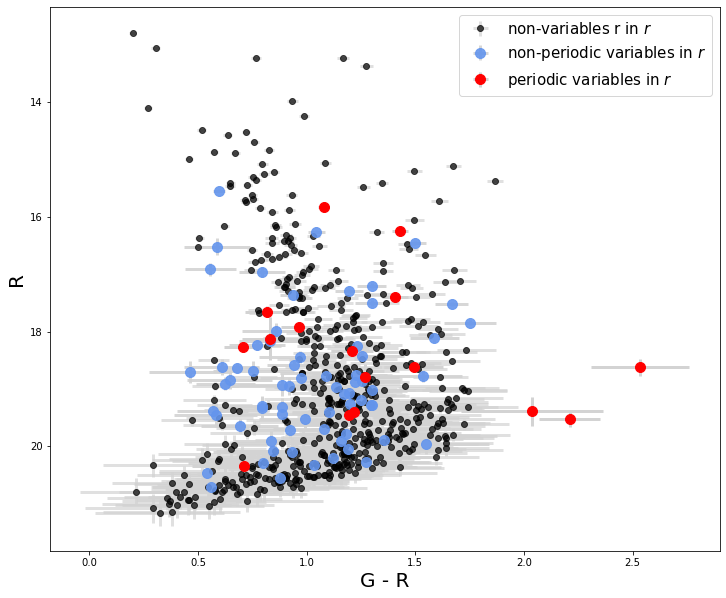

In [91]:
plt.figure(figsize=(12,10))
plt.gca().invert_yaxis()
plt.xlabel('G - R',fontsize=20)
plt.ylabel('R',fontsize=20)

# nonvar_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='o',color='black',
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.7,label='non-variables r in $r$')


# unobj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='o',color='cornflowerblue',markersize=10,
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.9,label='non-periodic variables in $r$')


# obj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_r'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_r'],fmt='o',color='red',markersize=10,
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=1,label='periodic variables in $r$')

#plt.xlim(0,2)
#plt.ylim(21,18)
plt.legend(loc=0,fontsize=15)

In [119]:
def scatter_hist(x, y, xerr, yerr, color, alpha, markersize, label, ax, ax_histx, ax_histy, bins=25):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    #ax.scatter(x, y)
    ax.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o',color=color,ecolor='lightgray', elinewidth=3, capsize=0,markersize=markersize, alpha=alpha,label=label)

    # x,y hist
    ax_histx.hist(x, histtype='step',density=1, color=color,bins=bins,linewidth=2,alpha=alpha)
    ax_histy.hist(y, histtype='step',density=1, color=color,bins=bins, orientation='horizontal',linewidth=2,alpha=alpha)

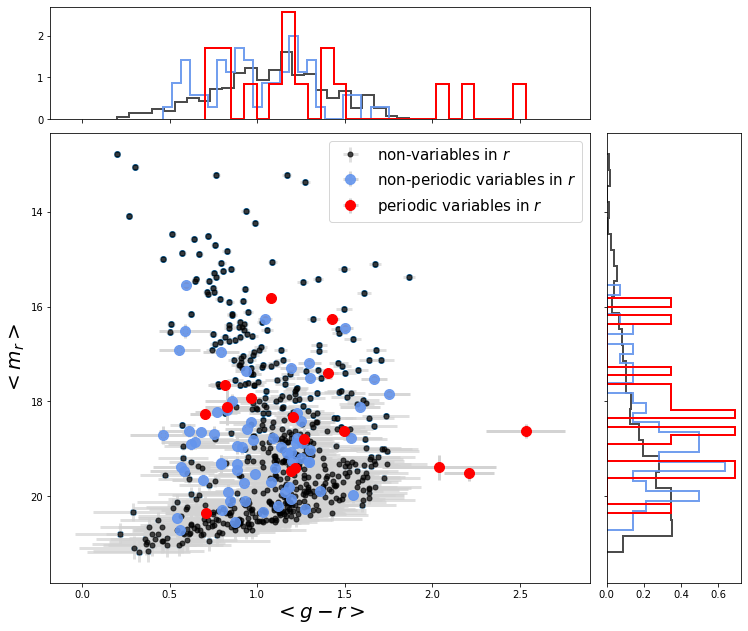

In [152]:
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

# nonvar_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'black',0.7,5,'non-variables in $r$'
             ,ax, ax_histx, ax_histy)

# unobj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'cornflowerblue',0.9,10,'non-periodic variables in $r$'
             ,ax, ax_histx, ax_histy)

# obj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_r'],t_plot['std_color'],t_plot['std_mag_r'],'red',1,10,'periodic variables in $r$'
             ,ax, ax_histx, ax_histy)

ax.set_xlabel('$<g - r>$',fontsize=20)
ax.set_ylabel('$<m_r>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

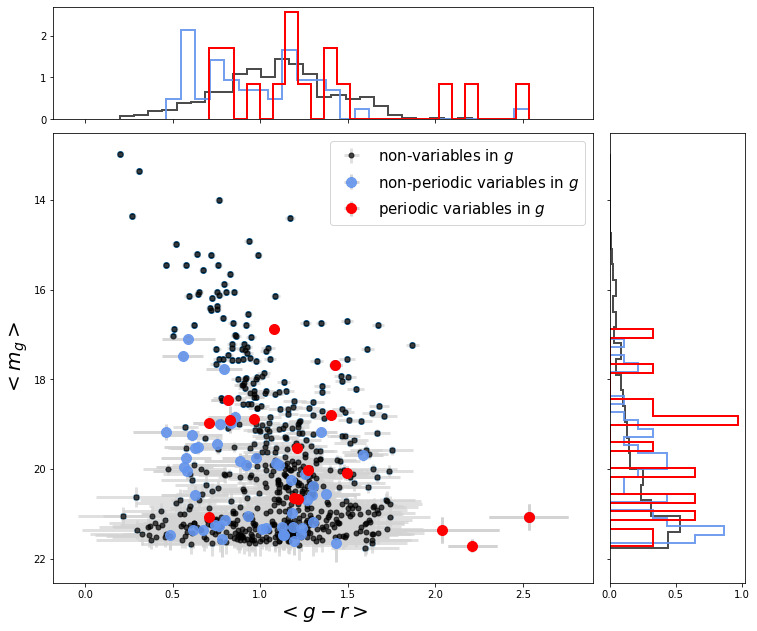

In [153]:
# Start with a square Figure.
fig = plt.figure(figsize=(12,10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.invert_yaxis()


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

# nonvar_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'black',0.7,5,'non-variables in $g$'
             ,ax, ax_histx, ax_histy)

# unobj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'cornflowerblue',0.9,10,'non-periodic variables in $g$'
             ,ax, ax_histx, ax_histy)

# obj_zr
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

scatter_hist(t_plot['mean_color'], t_plot['mean_mag_g'],t_plot['std_color'],t_plot['std_mag_g'],'red',1,10,'periodic variables in $g$'
             ,ax, ax_histx, ax_histy)

ax.set_xlabel('$<g - r>$',fontsize=20)
ax.set_ylabel('$<m_g>$',fontsize=20)
ax.legend(loc=0,fontsize=15)

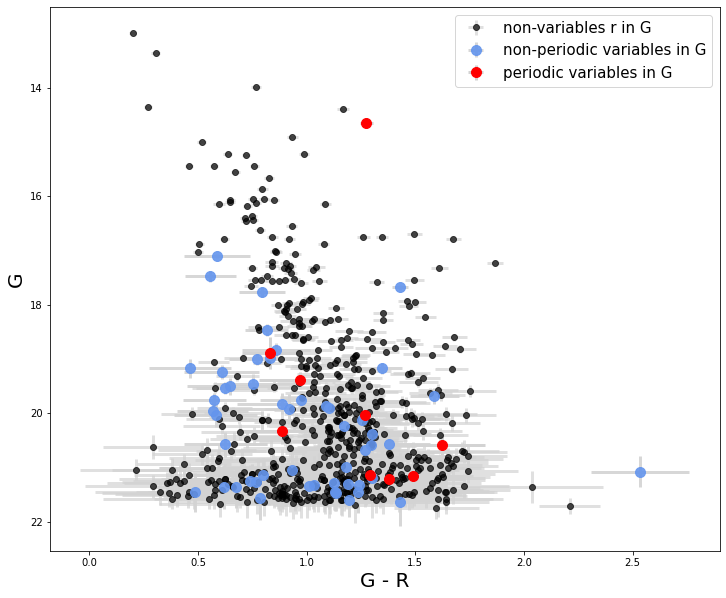

In [79]:
plt.figure(figsize=(12,10))
plt.gca().invert_yaxis()
plt.xlabel('G - R',fontsize=20)
plt.ylabel('G',fontsize=20)

# nonvar_zg
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_g'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_g'],fmt='o',color='black',
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.7,label='non-variables r in G')


# unobj_zg
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_g'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_g'],fmt='o',color='cornflowerblue',markersize=10,
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=0.9,label='non-periodic variables in G')


# obj_zg
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]

plt.errorbar(t_plot['mean_color'],t_plot['mean_mag_g'],xerr=t_plot['std_color'],yerr=t_plot['std_mag_g'],fmt='o',color='red',markersize=10,
             ecolor='lightgray', elinewidth=3, capsize=0,alpha=1,label='periodic variables in G')

#plt.xlim(0,2)
#plt.ylim(21,18)
plt.legend(loc=0,fontsize=15)

In [75]:
t_plot

SourceID,mean_color,std_color,max_color,min_color,mean_mag_r,std_mag_r,max_mag_r,min_mag_r,mean_mag_g,std_mag_g,max_mag_g,min_mag_g
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
73,0.8864079475402832,0.1913117245438033,1.3744182586669922,0.04401969909667969,19.436952590942383,0.14209401607513428,19.732688903808594,18.890762329101562,20.327228546142578,0.23146717250347137,20.794662475585938,19.153165817260742
77,1.2697524060024303,0.1566320560352759,1.6706371307373047,0.6612396240234375,18.791976928710938,0.22717958688735962,19.1998348236084,17.675485610961914,20.02450942993164,0.31344184279441833,20.759401321411133,18.832887649536133
90,0.8292514394830774,0.12669687043914363,1.374359130859375,0.23621368408203125,18.124500274658203,0.3739984333515167,18.949966430664062,17.195171356201172,18.898109436035156,0.29480019211769104,19.611181259155273,18.297286987304688
443,1.4895788304946003,0.27677218723214253,2.009279251098633,0.4928855895996094,19.699129104614258,0.10129835456609726,20.088769912719727,19.336618423461914,21.151514053344727,0.26791107654571533,21.6740779876709,20.161453247070312
959,1.292448274020491,0.32174211991011553,1.7794685363769531,0.10829544067382812,19.83580207824707,0.12982550263404846,20.39980697631836,19.30921745300293,21.140100479125977,0.2844848036766052,21.54222869873047,19.84897232055664
1219,1.6213697791099548,0.2010975983195594,2.151805877685547,0.49092864990234375,18.98127555847168,0.0579012855887413,19.188018798828125,18.759069442749023,20.59395980834961,0.19112929701805115,21.078689575195312,19.435989379882812
1642,1.2746296130435568,0.028856604997819682,1.3418426513671875,1.1856212615966797,13.373697280883789,0.015153578482568264,13.433606147766113,13.315940856933594,14.649717330932617,0.03029390051960945,14.71679973602295,14.5626220703125
1742,1.378161883354187,0.3489591595306736,1.9429969787597656,-0.26885223388671875,19.831071853637695,0.10571683198213577,20.246143341064453,19.405582427978516,21.214624404907227,0.2907710373401642,21.729793548583984,19.77669334411621
2091,0.9674321183370888,0.18499700571083189,1.9125900268554688,0.05344581604003906,18.44174575805664,0.10200228542089462,19.071861267089844,18.096073150634766,19.395851135253906,0.16449441015720367,20.01334571838379,18.669248580932617


In [76]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_r']-t_plot['min_mag_r']).mean(),t_plot['std_mag_r'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.6671070418991409,
 0.09469715367605376,
 0.8590207233295574,
 0.1631466644142896)

In [77]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_r']-t_plot['min_mag_r']).mean(),t_plot['std_mag_r'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.9979933991151697,
 0.13429566264590798,
 0.9860747701981488,
 0.17861465959361011)

In [78]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zr['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_r']-t_plot['min_mag_r']).mean(),t_plot['std_mag_r'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.7861508727073669,
 0.13616155344061553,
 0.839984118938446,
 0.1399782964074667)

In [79]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(nonvar_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_g']-t_plot['min_mag_g']).mean(),t_plot['std_mag_g'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(0.8971893154844945,
 0.1560472096173967,
 0.8556933013760314,
 0.16063083000024062)

In [80]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(unobj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_g']-t_plot['min_mag_g']).mean(),t_plot['std_mag_g'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(1.33210242878307, 0.21771893616427074, 1.066195418617942, 0.2030616516296987)

In [81]:
t_plot=t_color[np.isin(t_color['SourceID'],np.unique(obj_zg['SourceID']))]
t_plot=t_plot[np.isnan(t_plot['mean_color'])==False]
(t_plot['max_mag_g']-t_plot['min_mag_g']).mean(),t_plot['std_mag_g'].mean(),(t_plot['max_color']-t_plot['min_color']).mean(),t_plot['std_color'].mean()

(1.4646512137518988,
 0.22986597029699218,
 1.394844479031033,
 0.20411836963548502)

In [82]:
t_zr=QTable.read('t_zr_1024.ecsv')
t_zg=QTable.read('t_zg_1024.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

In [83]:
upsilon_zr=t_zr[t_zr['upsilon_class']!='NonVar']
upsilon_zg=t_zg[t_zg['upsilon_class']!='NonVar']
upsilon_zr=upsilon_zr[upsilon_zr['upsilon_flag']==0]
upsilon_zg=upsilon_zg[upsilon_zg['upsilon_flag']==0]

In [84]:
len(np.unique(upsilon_zr['SourceID'])),len(np.unique(upsilon_zg['SourceID'])),len(np.unique(upsilon_zr[np.isin(upsilon_zr['SourceID'],upsilon_zg['SourceID'])==1]['SourceID']))

(35, 15, 4)

In [85]:
len(np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(upsilon_zr['SourceID'])))

23

In [86]:
len(np.intersect1d(np.unique(obj_zg['SourceID']),np.unique(upsilon_zg['SourceID'])))

3

In [87]:
np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(obj_zg['SourceID']))

array([77, 90])

In [88]:
np.intersect1d(np.unique(obj_zr['SourceID']),np.unique(upsilon_zr['SourceID']))

array([  52,   77,   90,  158,  168,  208,  210,  223,  225,  242,  265,
        354,  530,  577,  733,  778, 1169, 1259, 1299, 1555, 1706, 1744,
       2008])

In [89]:
upsilon_zr

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
50,zr,806203100056992,5.0847793,59.305823,438,26.07579231262207,2.6107927423368156,0.000806971208849762,0.23083563148975372,3.463105648531134e-12,223.91194916677907,0.997343815080248,0.24246865168903964,0.06281874602726414,20.486726760864258,0.23083563148975372,19.869138717651367,21.093555450439453,-0.20032791793346405,1.6513630151748657,0.020899946420963187,0.010016017577819572,0.02540505403358542,0.0,0.12703363363379405,0.08768528986628421,0.5983224576127097,g1,LPV_SRV_AGB_O,0.86,0.0,226.33803819000025
52,zr,806203100023276,5.0806496,59.3093092,664,48.39557647705078,9.548270702053268,1.3227187319910005e-189,0.3108588755130768,1.7018337280194596e-78,595.2450708466688,0.997336033066433,0.6229683753591274,0.21949631231274336,19.675853729248047,0.3108588755130768,19.17412567138672,20.918895721435547,-0.7161276936531067,3.285275936126709,0.05060821258505381,0.007833020026423389,0.026125014733712922,0.0,0.014227170500624942,0.0517871312497491,0.20132354399945207,g2,LPV_OSARG_AGB,0.33,0.0,566.9630815875007
77,zr,806203100063307,5.0870906,59.2998095,836,344.7351989746094,40.842491010031104,0.0,0.22717958688735962,7.488112388238467e-24,26.55255504914417,0.997336033066433,0.25554257162342087,0.0034232661997002983,18.791976928710938,0.22717958688735962,17.675485610961914,19.1998348236084,-0.8078729510307312,6.599571704864502,0.010941253454579771,0.0022451831278411214,0.04598158685382897,1.0,0.024749755228021697,0.001446042828369909,0.961198797591372,g1,CEPH_Other,0.44,0.0,26.524588612280738
90,zr,1809211300042387,5.083505,59.3114538,76,335.14105224609375,55.45322806162426,0.0,0.2555650770664215,2.0784866526889912e-39,2800.0,2800.0,0.9309604412577608,0.9992448196539399,18.229490280151367,0.2555650770664215,17.943700790405273,18.82109832763672,-1.287727952003479,7.673773765563965,0.5555584658587479,0.04627441335937462,0.5534192405367697,0.0,0.004179634055204828,0.004211741656930057,0.49803513609818195,g2,LPV_Mira_AGB_C,0.31,0.0,1328.6934374999983
90,zr,806203100056957,5.0836327,59.3114535,846,567.4482421875,120.79296419281002,0.0,0.3739984333515167,3.247011689208663e-280,2043.207284960579,0.997336033066433,0.9506730073393318,0.47493011002121566,18.124500274658203,0.3739984333515167,17.195171356201172,18.949966430664062,-2.5609970092773438,11.737095832824707,0.18947997991941207,0.020160519579386485,0.15060952910358819,0.0,0.006788985925998747,0.01068657840378251,0.38484022277800156,g2,LPV_Mira_AGB_C,0.26,0.0,2267.852326350003
107,zr,806203100065432,5.0537228,59.2994666,354,22.948423385620117,2.8663962274228902,5.649783470328897e-05,0.27633973956108093,1.9831985249099693e-22,475.6919759026841,0.9973157097647236,0.4455083958492991,0.1868320014773206,20.701658248901367,0.27633973956108093,20.04710578918457,21.38593292236328,-0.2179374098777771,1.7309147119522095,0.020898771877050838,0.005355123131041611,0.023781615071955843,0.0,0.038180332590132426,0.029678840488872482,0.5654934345597256,g2,LPV_SRV_AGB_C,0.42,0.0,446.97659027999987
158,zr,806203100057075,5.0953672,59.297784,702,85.88482666015625,6.528562040377028,1.9791103413711206e-94,0.179270938038826,5.255097789862924e-52,595.2450708466688,0.997336033066433,0.4806277327856466,0.1408160323876546,19.39754295349121,0.179270938038826,18.829944610595703,19.830501556396484,-0.3216327726840973,2.6130337715148926,0.04033986549469937,0.01823640263202334,0.044388907661337296,0.0,0.1137638087262609,0.09485607097744764,0.5485841987547181,g1,LPV_SRV_AGB_O,0.39,0.0,647.9578075285723
168,zr,806

In [90]:
obj_zr.show_in_notebook()

idx,SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
0,52,zr,806203100023276,5.0806496,59.3093092,664,48.39557647705078,9.548270702053268,1.3227187319910005e-189,0.3108588755130768,1.7018337280194596e-78,595.2450708466688,0.997336033066433,0.6229683753591274,0.21949631231274336,19.675853729248047,0.3108588755130768,19.17412567138672,20.918895721435547,-0.7161276936531067,3.285275936126709,0.05060821258505381,0.007833020026423389,0.026125014733712922,0.0,0.014227170500624942,0.0517871312497491,0.20132354399945207,g2,LPV_OSARG_AGB,0.33,0.0,566.9630815875007
1,77,zr,806203100063307,5.0870906,59.2998095,836,344.7351989746094,40.842491010031104,0.0,0.22717958688735962,7.488112388238467e-24,26.55255504914417,0.997336033066433,0.25554257162342087,0.0034232661997002983,18.791976928710938,0.22717958688735962,17.675485610961914,19.1998348236084,-0.8078729510307312,6.599571704864502,0.010941253454579771,0.0022451831278411214,0.04598158685382897,1.0,0.024749755228021697,0.001446042828369909,0.961198797591372,g1,CEPH_Other,0.44,0.0,26.524588612280738
2,90,zr,806203100056957,5.0836327,59.3114535,846,567.4482421875,120.79296419281002,0.0,0.3739984333515167,3.247011689208663e-280,2043.207284960579,0.997336033066433,0.9506730073393318,0.47493011002121566,18.124500274658203,0.3739984333515167,17.195171356201172,18.949966430664062,-2.5609970092773438,11.737095832824707,0.18947997991941207,0.020160519579386485,0.15060952910358819,0.0,0.006788985925998747,0.01068657840378251,0.38484022277800156,g2,LPV_Mira_AGB_C,0.26,0.0,2267.852326350003
3,145,zr,806203100043772,5.0957151,59.2994528,717,66.61664581298828,3.5379984089296954,2.2753838245357322e-18,0.14171883463859558,1.0515294240953812e-12,981.7766691905116,0.997336033066433,0.17591322363193937,0.09890003454859338,19.4619083404541,0.14171883463859558,18.99640655517578,20.149547576904297,-0.18844391405582428,1.9061943292617798,0.014671911593230497,0.003428865224048767,0.0160385433525674,0.0,0.03191100590870233,0.026816135608569547,0.5452531399277134,g2,NonVar,0.35,0.0,1133.9261631750014
4,158,zr,806203100057075,5.0953672,59.297784,702,85.88482666015625,6.528562040377028,1.9791103413711206e-94,0.179270938038826,5.255097789862924e-52,595.2450708466688,0.997336033066433,0.4806277327856466,0.1408160323876546,19.39754295349121,0.179270938038826,18.829944610595703,19.830501556396484,-0.3216327726840973,2.6130337715148926,0.04033986549469937,0.01823640263202334,0.044388907661337296,0.0,0.1137638087262609,0.09485607097744764,0.5485841987547181,g1,LPV_SRV_AGB_O,0.39,0.0,647.9578075285723
5,168,zr,806203100060423,5.0989475,59.3023316,603,43.353397369384766,3.6096865088249213,9.805802856611858e-19,0.20166358351707458,5.211841335015464e-23,481.50270086755603,0.997336033066433,0.28793891233976,0.19382587404148513,19.980669021606445,0.20166358351707458,19.334941864013672,20.572986602783203,-0.2577386200428009,1.9497979879379272,0.02288762441783082,0.005203361869715385,0.015654582112170936,0.0,0.030238490340185997,0.06319318525503015,0.31436707892533344,g2,LPV_OSARG_AGB,0.26,0.0,503.96718363333395
6,208,zr,806203100063224,5.064121,59.3186488,785,57.229671478271484,14.973554136565346,0.0,0.36998096108436584,5.372709522621155e-121,706.5076598069519,0.997336033066433,0.7610530058290755,0.04136356170280423,19.66598129272461,0.36998096108436584,19.045684814453125,20.505390167236328,-1.0772920846939087,4.238379955291748,0.17628564083475765,0.011430201762155813,0.16293005537513924,0.0,0.002541930809623727,0.0029726457721277466,0.45994782479317364,g2,LPV_OSARG_AGB,0.4,0.0,647.9578075285723
7,210,zr,806203100060348,5.0498178,59.314207,524,46.50968933105469,7.160523506839386,1.1875559898120985e-83,0.2575588822364807,6.041918640486786e-47,2042.1167531644894,0.997343815080248,0.5563482426780246,0.4855985622455

In [91]:
functions.query(145)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
145,zr,806203100043772,5.0957151,59.2994528,717,66.61664581298828,3.5379984089296954,2.2753838245357322e-18,0.14171883463859558,1.0515294240953812e-12,981.7766691905116,0.997336033066433,0.17591322363193937,0.09890003454859338,19.4619083404541,0.14171883463859558,18.99640655517578,20.149547576904297,-0.18844391405582428,1.9061943292617798,0.014671911593230497,0.003428865224048767,0.0160385433525674,0.0,0.03191100590870233,0.026816135608569547,0.5452531399277134,g2,NonVar,0.35,0.0,1133.9261631750014
145,zr,1809211300042604,5.095706,59.2993843,70,49.061622619628906,3.04362781022782,0.0034006701634084267,0.12611249089241028,4.3440289466632065e-08,0.5005857784631169,2800.0,0.5151418768924364,0.4038407234398711,19.473413467407227,0.12611249089241028,19.224807739257812,19.792285919189453,-0.1626230925321579,1.7541042566299438,0.28131470084599547,0.24014997862142634,0.22691212939950534,0.0,0.3652222781345995,0.5261213778525741,0.39200176752438864,gu,RRL_c,0.69,1.0,0.3332561031602737


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
145,zg,1809111300037359,5.0955739,59.2994134,27,12.475582122802734,1.3594864375813056,0.887333395810309,0.18075062334537506,0.3823820206418178,0.10313280357686568,2800.0,0.4111718683499969,0.12895766339242193,20.607967376708984,0.18075062334537506,20.317750930786133,20.94916343688965,-0.0995478704571724,1.156970500946045,0.21410086967507921,0.3035168272701912,0.20978881332210736,0.0,0.8166576619351427,0.838430241716654,0.4896391774418156,gu,NonVar,0.36,1.0,0.030445886366578186
145,zg,806103100029929,5.0955994,59.2993467,167,28.604887008666992,1.841649684812824,0.7615938253505716,0.17869067192077637,0.0008445053205045829,0.1915878715242689,1.0000143393856216,0.15879330850693638,0.01132239859652,20.637638092041016,0.17869067192077637,20.012495040893555,21.093690872192383,-0.11102097481489182,1.367995262145996,0.009580666023678774,0.0018563271605288873,0.05851629500128366,1.0,0.022118185787693756,0.0006124058580260217,0.9854163893214144,g1,DSCT,0.89,1.0,0.1915815593765839


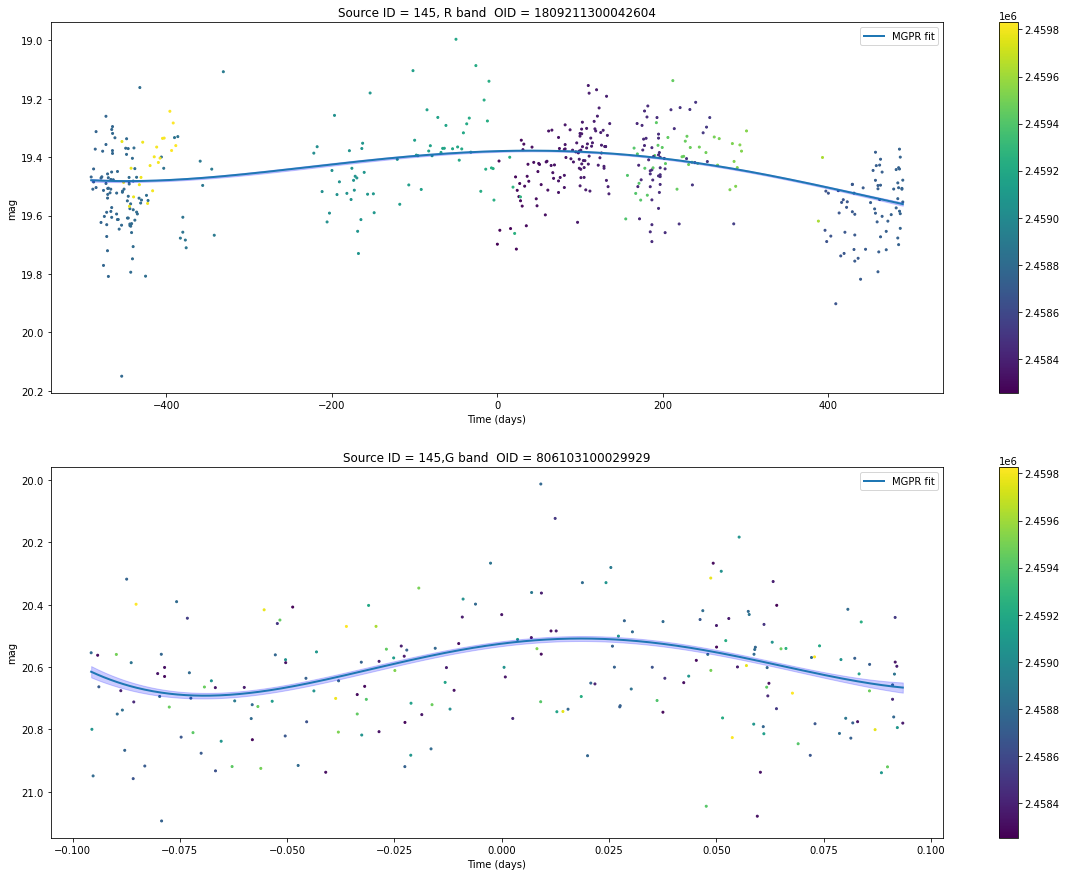

In [65]:
functions.MGPRfit(145,errscale=0.5)

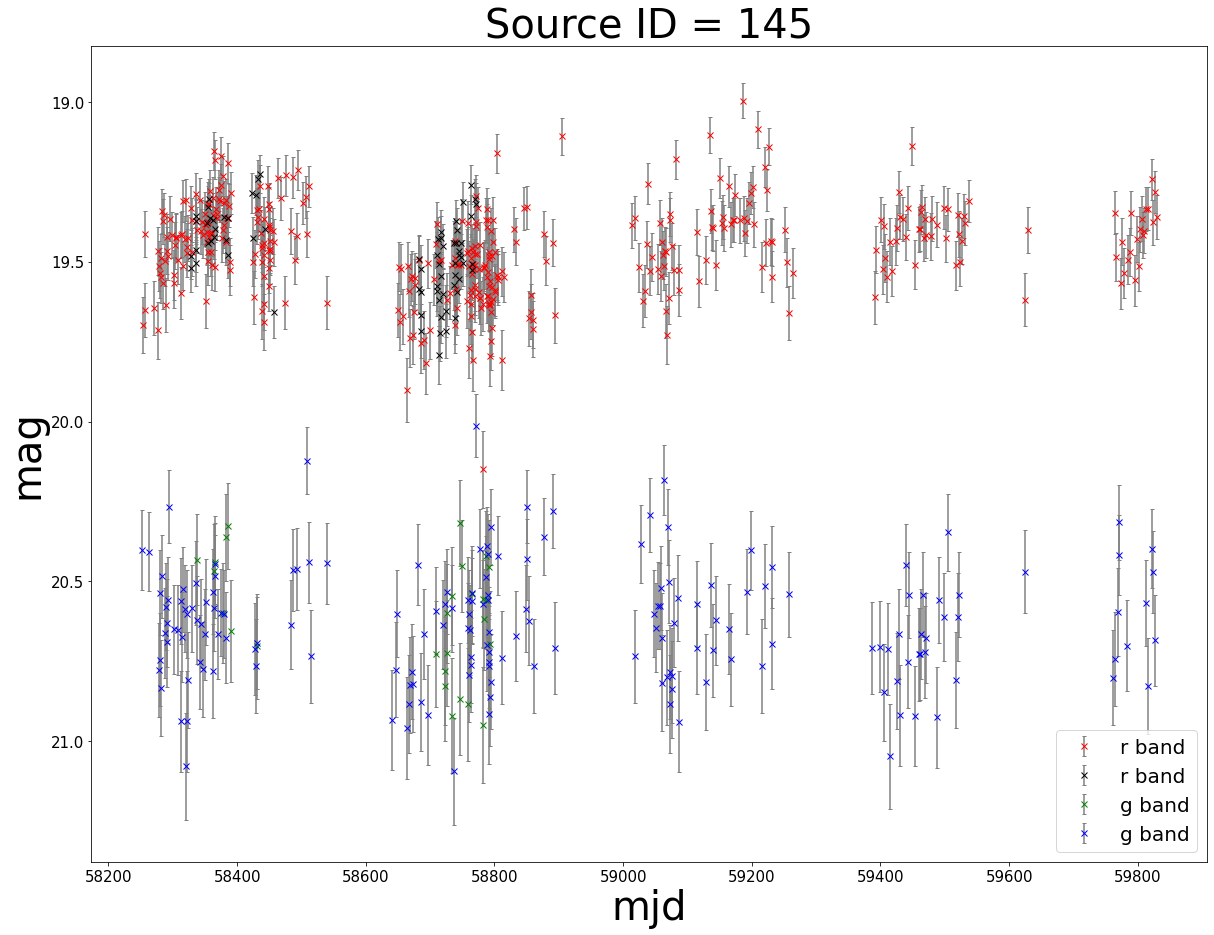

In [66]:
functions.draw_lightcurve(145)

In [67]:
functions.query(439)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
439,zr,1809211300042148,5.0742247,59.3260104,68,24.0855770111084,1.4642729439121258,0.9511868759873303,0.11887487769126892,0.0004600938675696531,1.3914628119637142,2800.0,0.3612868249358036,0.011717249119181596,19.920970916748047,0.11887487769126892,19.683393478393555,20.19719696044922,-0.10407295823097229,1.2145365476608276,0.3015237875436522,0.2939809865129014,0.44909048586525974,0.0,0.45898348422516155,0.22692124166173633,0.6939116401576699,g1,CEPH_F,0.31,1.0,1.3909859943336642
439,zr,806203100043284,5.0741825,59.3260349,662,42.31599426269531,3.4373748469641683,8.763464508600559e-17,0.2168726772069931,6.84641750548418e-23,238.04133729120863,0.997343815080248,0.270724498758034,0.0669710949966615,20.104284286499023,0.2168726772069931,19.3428955078125,20.985332489013672,-0.26043152809143066,1.9058979749679565,0.008169558383902745,0.0012830310537330653,0.009699418886023034,0.0,0.014641262838516855,0.010439056165814531,0.5866762443357652,g2,EB_ED,0.62,1.0,1.0006102484084891


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64


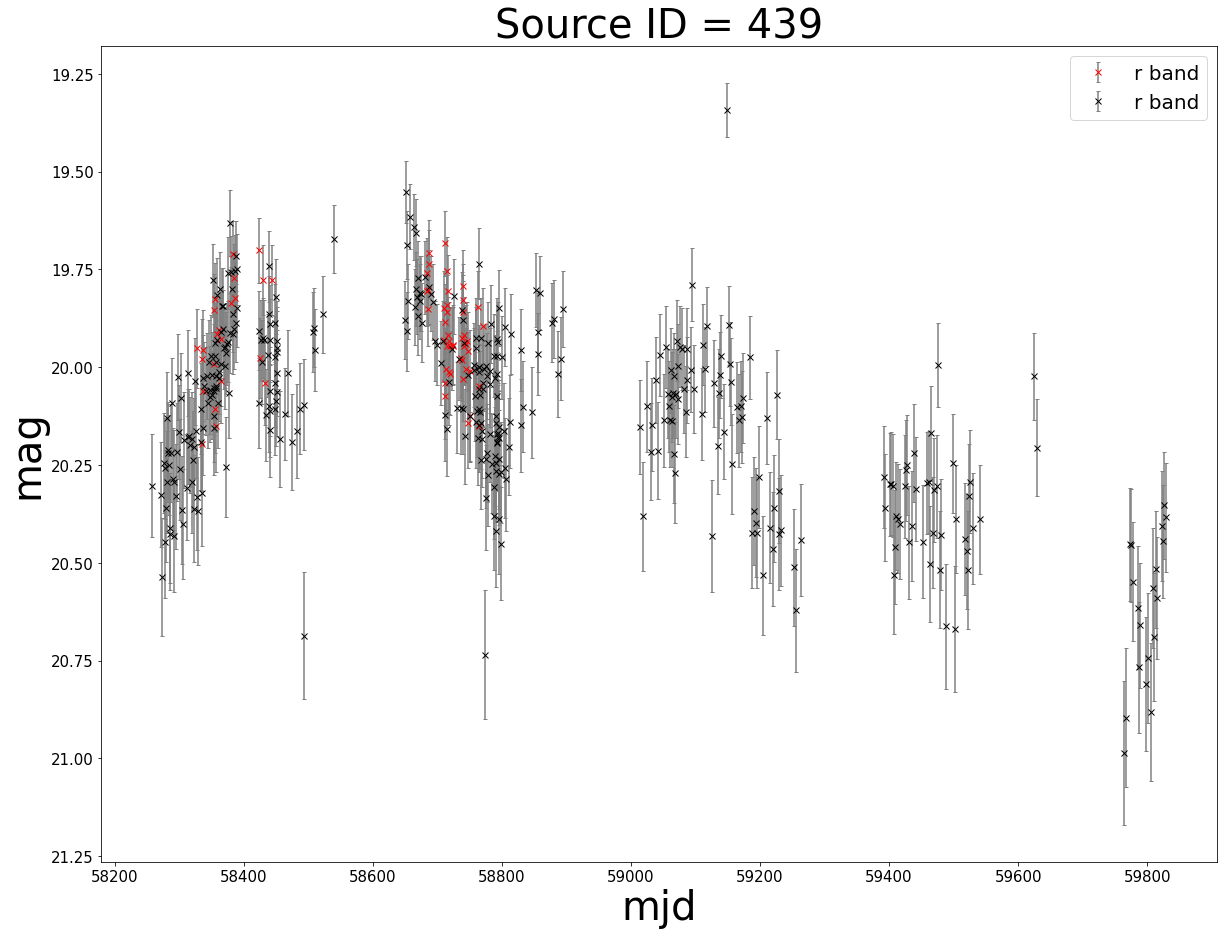

In [68]:
functions.draw_lightcurve(439)

L-S_period: 1.3914628119637142
fit_period: 1.6142932903737164
sin_chi2: 0.94306227
L-S_period: 238.04133729120863
fit_period: 243.94196123474327
sin_chi2: 3.36083225


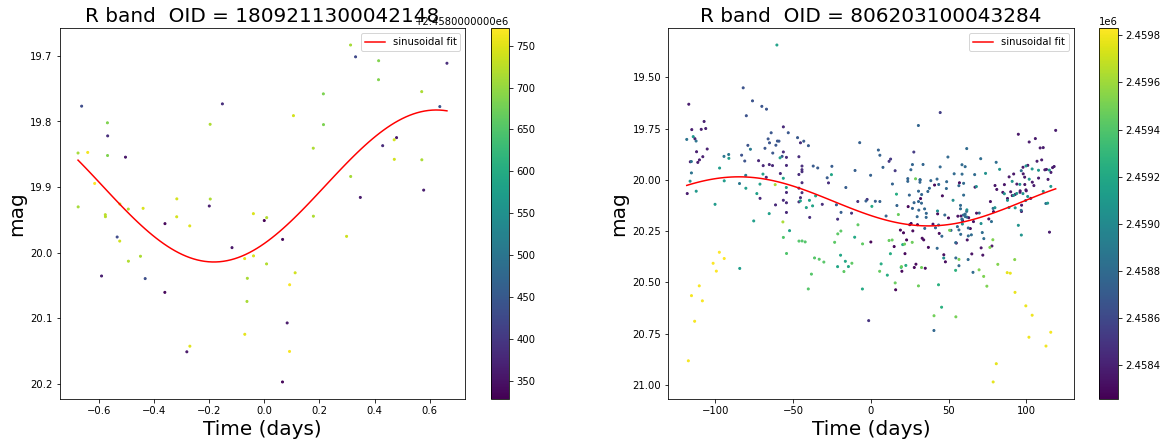

In [69]:
functions.sinfit(439)

In [70]:
functions.query(2813)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
2813,zr,806203400051460,5.1056321,59.2459608,214,305.3210144042969,390.70754678491767,0.0,0.565703272819519,9.130724410339825e-12,368.4535100727675,1.0000014120485934,0.5216930985418803,0.4869248467327726,19.309696197509766,0.565703272819519,16.342483520507812,20.012256622314453,-4.518640041351318,23.71954917907715,0.018434855263553113,0.032260996341697934,0.019288172808330752,0.0,0.9999999999969353,0.9773542999047296,0.523031331679768,g1,NonVar,0.38,1.0,1909.2845833499996


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64


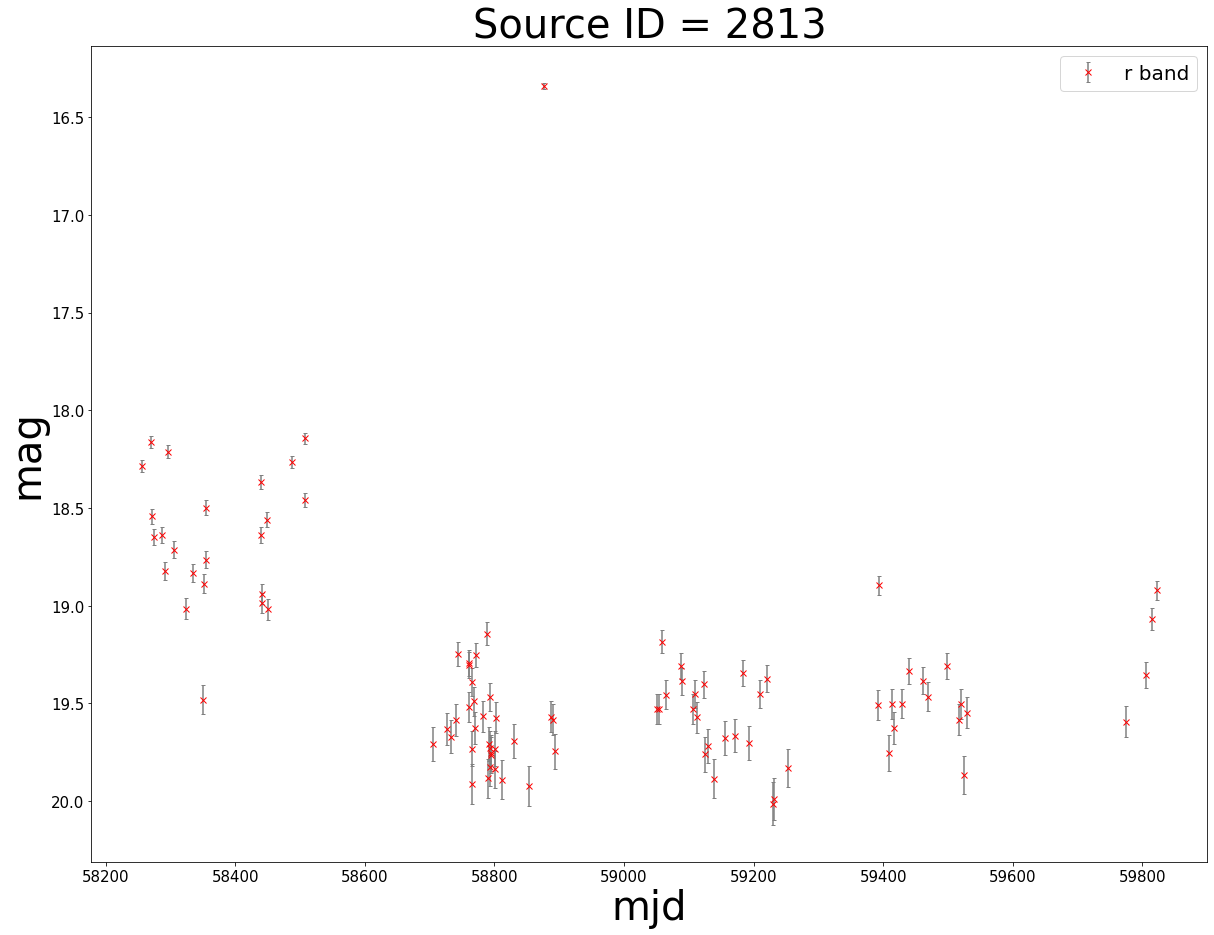

In [71]:
functions.draw_lightcurve(2813)

L-S_period: 368.4535100727675
fit_period: 371.32959488030764
sin_chi2: 439.89170967


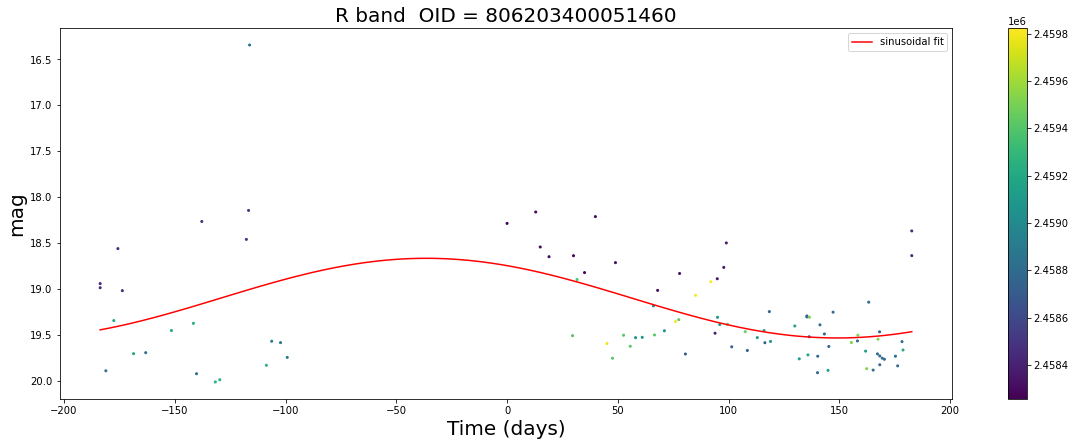

In [72]:
functions.sinfit(2813)

In [73]:
functions.query(50)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
50,zr,806203100056992,5.0847793,59.305823,438,26.07579231262207,2.6107927423368156,0.000806971208849762,0.23083563148975372,3.463105648531134e-12,223.91194916677907,0.997343815080248,0.24246865168903964,0.06281874602726414,20.486726760864258,0.23083563148975372,19.869138717651367,21.093555450439453,-0.20032791793346405,1.6513630151748657,0.020899946420963187,0.010016017577819572,0.02540505403358542,0.0,0.12703363363379405,0.08768528986628421,0.5983224576127097,g1,LPV_SRV_AGB_O,0.86,0.0,226.33803819000025
50,zr,1809211300070206,5.0848415,59.3057772,46,22.17166519165039,2.217825294097687,0.2847788502030217,0.21391645073890686,6.0221749546566455e-05,0.5083811140507174,2800.0,0.5296320007600701,0.15438356554563615,20.468717575073242,0.21391645073890686,20.032848358154297,21.13528823852539,-0.18498404324054718,1.5076112747192383,0.17223729353562936,0.12687535031422165,0.24294313257932024,0.0,0.2811236022375865,0.1493102749960884,0.669329676063277,g1,LPV_Mira_AGB_C,0.38,1.0,652.2697222499955


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64


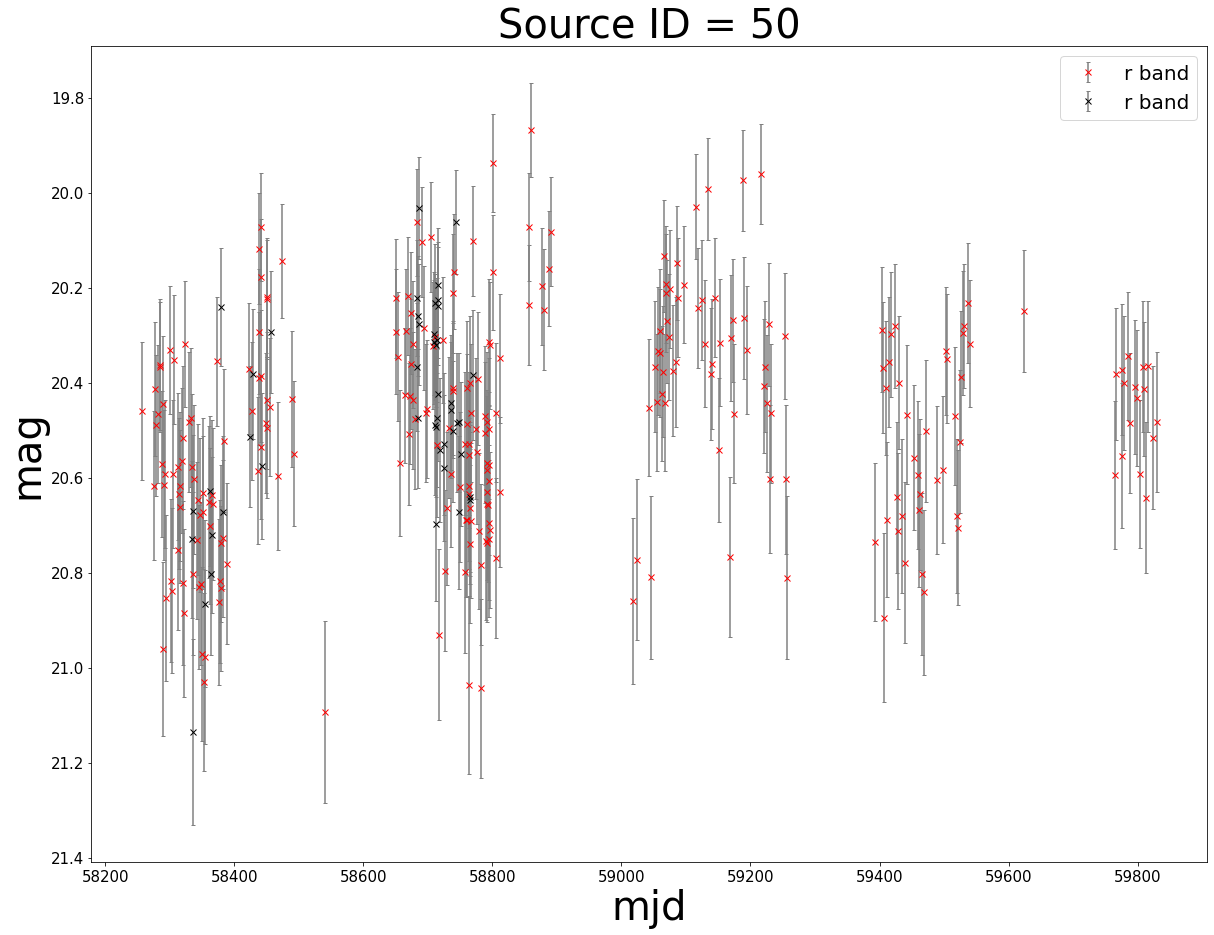

In [74]:
functions.draw_lightcurve(50)

No data found in G band


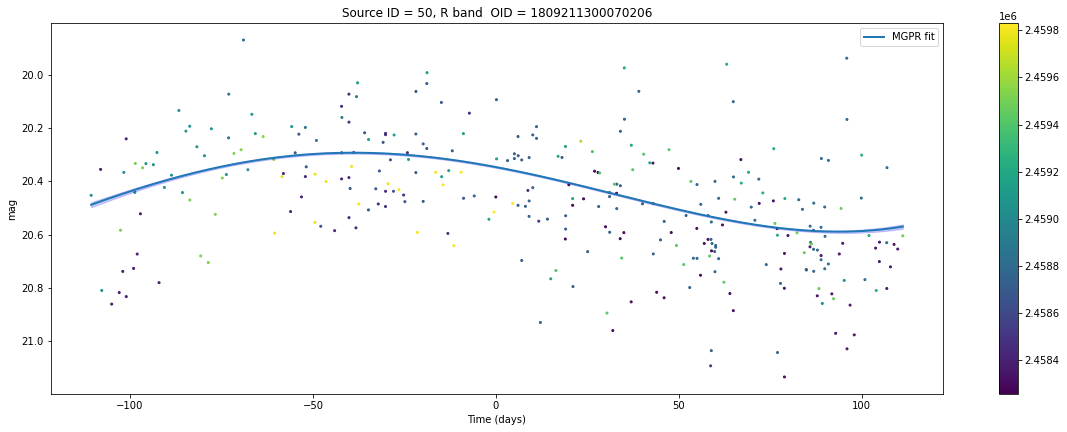

In [75]:
functions.MGPRfit(50,errscale=0.25)

L-S_period: 223.91194916677907
fit_period: 248.1809944508579
sin_chi2: 2.04205657
L-S_period: 0.5083811140507174
fit_period: 0.4637608499208568
sin_chi2: 1.07210292


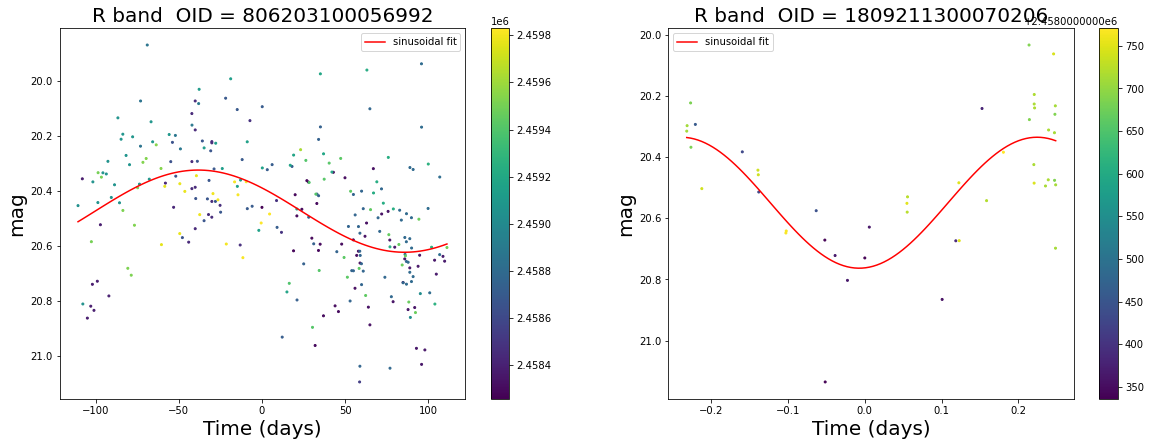

In [76]:
functions.sinfit(50)

In [96]:
t=obj_zr
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=row['RA']
    simbad[i,1]=row['DEC']
np.savetxt('simbad_periodic_zr.txt',simbad,fmt='%.18f')

In [97]:
t=obj_zg
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=row['RA']
    simbad[i,1]=row['DEC']
np.savetxt('simbad_periodic_zg.txt',simbad,fmt='%.18f')

In [116]:
t=np.unique(unobj_zr['SourceID'])
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=np.mean(unobj_zr[unobj_zr['SourceID']==row]['RA'])
    simbad[i,1]=np.mean(unobj_zr[unobj_zr['SourceID']==row]['DEC'])
np.savetxt('simbad_nonperiodic_zr.txt',simbad,fmt='%.18f')

In [117]:
t=np.unique(unobj_zg['SourceID'])
simbad=np.zeros((len(t),2))
for i,row in enumerate(t):
    simbad[i,0]=np.mean(unobj_zg[unobj_zg['SourceID']==row]['RA'])
    simbad[i,1]=np.mean(unobj_zg[unobj_zg['SourceID']==row]['DEC'])
np.savetxt('simbad_nonperiodic_zg.txt',simbad,fmt='%.18f')

In [2]:
functions.query(1299)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
1299,zr,806203100023129,5.1539289,59.3135314,854,197.82797241210938,2.7845959916233016,8.530009142395865e-08,0.05892377719283104,2.8366516059465913e-31,3.4010475333652077,0.997336033066433,0.3032918259204402,0.01030609793810549,18.332311630249023,0.05892377719283104,18.088233947753906,18.604610443115234,-0.06086678430438042,1.6700814962387085,0.21225719823248787,0.011460107658360516,0.4472967585450967,0.0,0.001766289233870677,0.0003999268603702699,0.8267342562578373,g2,EB_ESD,0.68,0.0,3.4026291468117074
1299,zr,1809211300007283,5.1539485,59.3135173,77,140.62802124023438,3.841370007592759,2.510158888045934e-06,0.06144300103187561,1.1884953264989655e-11,3.4027659269629043,2800.0,0.5868525678804262,0.014952468343091855,18.3205623626709,0.06144300103187561,18.164974212646484,18.451139450073242,-0.07494369149208069,1.95154869556427,0.6638399794514294,0.8100882631890592,1.2727447216483052,1.0,0.6592933533588327,0.21553953910323265,0.7950424032726369,g1,CEPH_1O,0.46,1.0,3.4069062499999956


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64
1299,zg,806103100019786,5.1539114,59.3135274,324,53.868614196777344,1.8394977186270967,0.848191583688778,0.09805630892515182,1.6596364604563349e-09,3.4011826003596766,1.0000143393856216,0.1611956743979476,0.01409755046782724,19.541732788085938,0.09805630892515182,19.238975524902344,19.853981018066406,-0.08506390452384949,1.3622061014175415,0.1311333635141622,0.0479548350857191,0.17169875157514314,0.0,0.07592957735864703,0.045136972916553275,0.6344200062484924,g2,EB_ESD,0.39,0.0,3.40276444096024
1299,zg,1809111300037238,5.1539493,59.3135091,62,41.663726806640625,1.5354402319381353,0.9093189449280512,0.09419509768486023,0.004309321596730584,3.4328141039860687,2800.0,0.3364783323053183,0.050906851019238746,19.51762580871582,0.09419509768486023,19.218833923339844,19.73865509033203,-0.07683558017015457,1.2365236282348633,0.1696208173624249,0.0687546168006633,0.4345514778805323,1.0,0.09245406044102589,0.014856594651591726,0.8811322337792876,g1,DSCT,0.56,1.0,0.03187954314595965


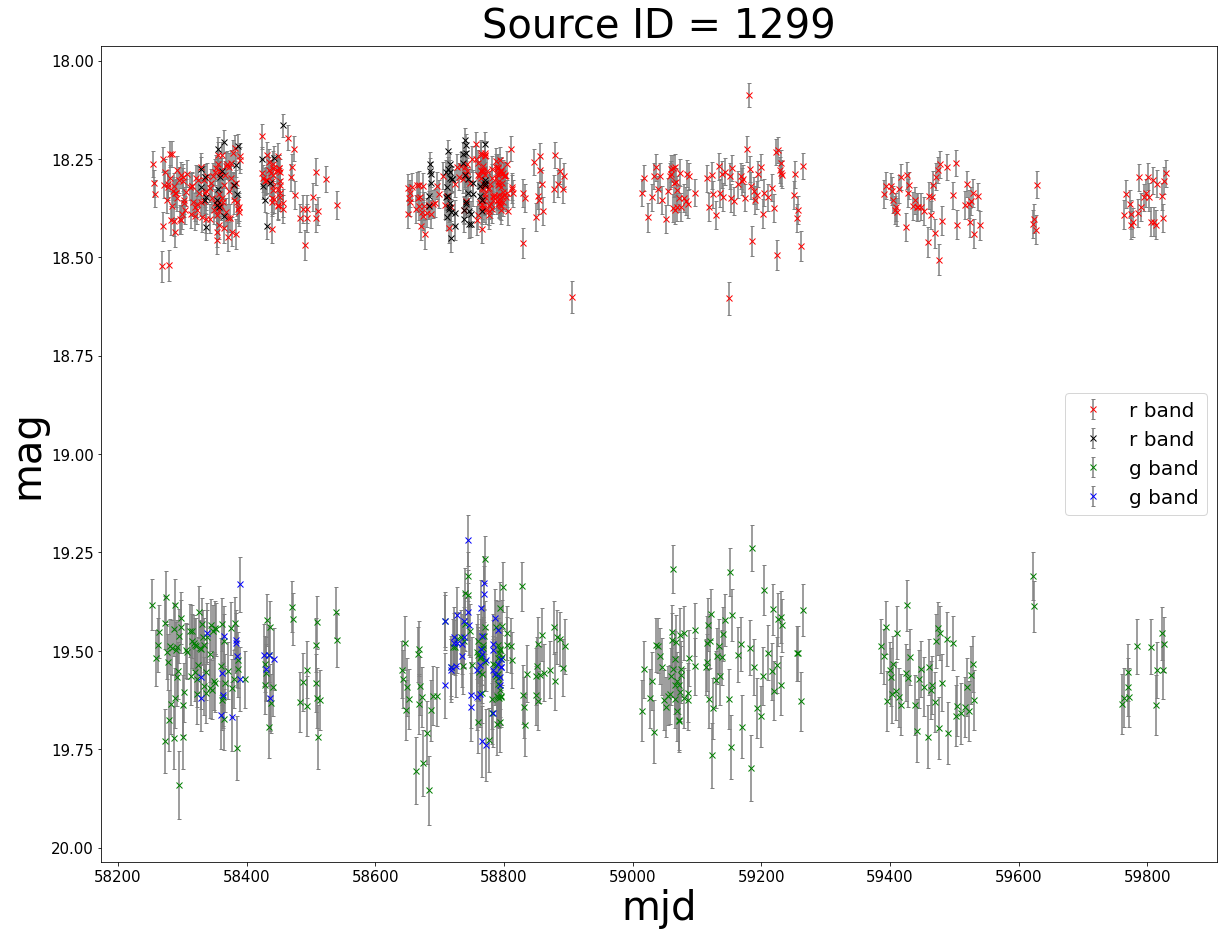

In [4]:
functions.draw_lightcurve(1299)

L-S_period: 3.4010475333652077
fit_period: 3.6399105150623
sin_chi2: 1.92680736
L-S_period: 3.4027659269629043
fit_period: 3.6923396490829967
sin_chi2: 1.58207348
L-S_period: 3.4011826003596766
fit_period: 3.150622478749635
sin_chi2: 1.56260055
L-S_period: 3.4328141039860687
fit_period: 3.5395421307623556
sin_chi2: 1.02911794


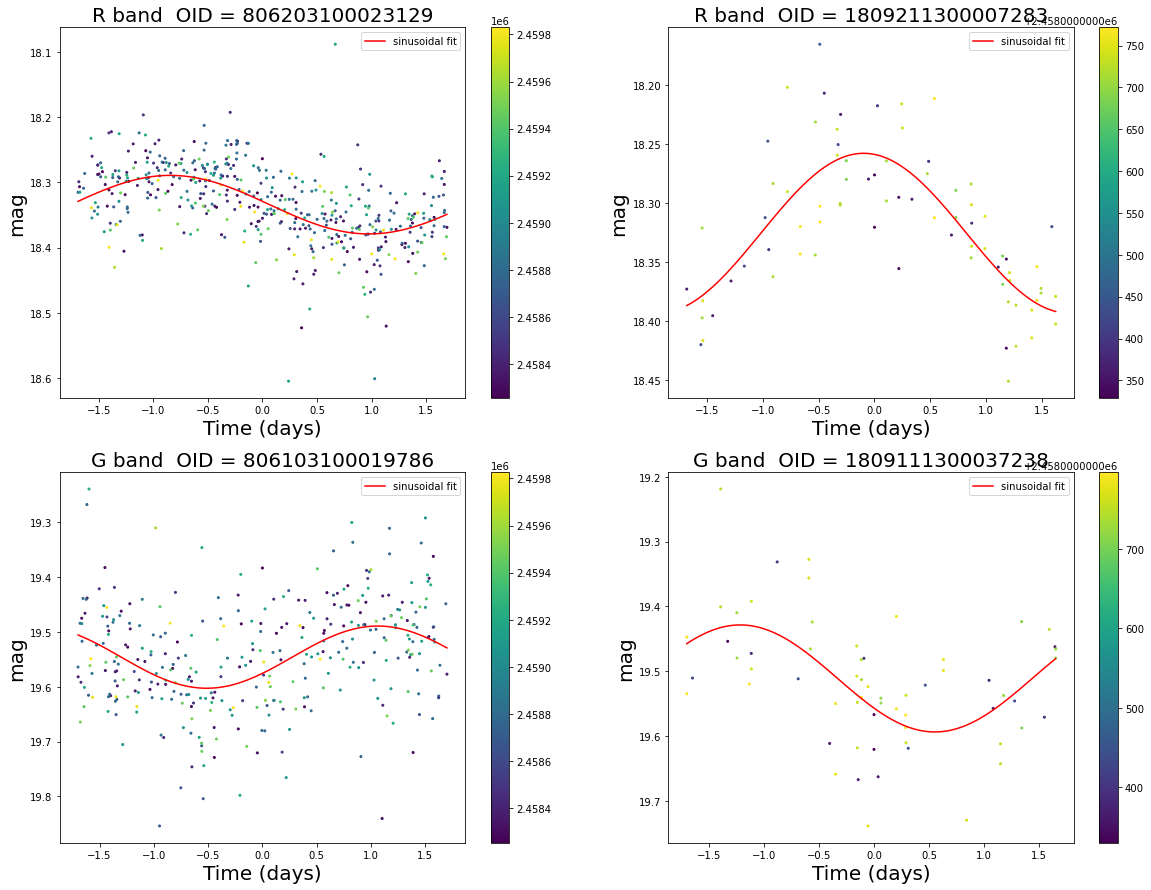

In [5]:
functions.sinfit(1299)

In [137]:
len(sourcefy(obj_zr)),len(sourcefy(obj_zr[np.isnan(obj_zr['dist'])==False]))

(32, 14)

In [138]:
len(sourcefy(obj_zg)),len(sourcefy(obj_zg[np.isnan(obj_zg['dist'])==False]))

(9, 3)

In [139]:
len(sourcefy(unobj_zr)),len(sourcefy(unobj_zr[np.isnan(unobj_zr['dist'])==False]))

(155, 43)

In [140]:
len(sourcefy(unobj_zg)),len(sourcefy(unobj_zg[np.isnan(unobj_zg['dist'])==False]))

(88, 26)

In [129]:
len(sourcefy(obj_zr)),len(sourcefy(obj_zr[obj_zr['Gaia_count']!=0]))

(32, 28)

In [131]:
len(sourcefy(obj_zg)),len(sourcefy(obj_zg[obj_zg['Gaia_count']!=0]))

(9, 9)

In [133]:
len(sourcefy(unobj_zr)),len(sourcefy(unobj_zr[unobj_zr['Gaia_count']!=0]))

(155, 100)

In [134]:
len(sourcefy(unobj_zg)),len(sourcefy(unobj_zg[unobj_zg['Gaia_count']!=0]))

(88, 67)